In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\keshavaram\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\keshavaram\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Users\keshavaram\AppData\Local\Programs\Python\Python310\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "c:\Users\keshavaram\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 464, in read
    s = self.fp.read(amt)
  File "c:\Users\keshavaram\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\keshavaram\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1273, in recv_into
    return self.read(nbytes, buffer)
  F

In [2]:

image_size = (32, 32)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./32, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    'rice_images',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'rice_images',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


NameError: name 'ImageDataGenerator' is not defined

In [ ]:

class RBFLayer(layers.Layer):
    def __init__(self, output_dim):
        self.output_dim = output_dim
        super(RBFLayer, self).__init__()

    def build(self, input_shape):
        kmeans = KMeans(n_clusters=self.output_dim, random_state=42)
        centers = kmeans.fit(np.random.randn(100, input_shape[-1])).cluster_centers_

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[-1]),
                                       initializer=tf.constant_initializer(centers),
                                       trainable=True)
        super(RBFLayer, self).build(input_shape)
    def call(self, x):
        diff = tf.expand_dims(x, axis=1) - self.centers
        norm = tf.norm(diff, axis=-1)
        sigma=tf.math.reduce_std(x)
        return tf.exp(-0.1 * tf.square(norm)/(2*(sigma**2)))



model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)), 
    layers.Dense(128, activation='relu'),
    RBFLayer(3), 
    layers.Dense(3, activation='softmax')  
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=val_generator)

test_loss, test_acc = model.evaluate(val_generator)
print(f'\nTest accuracy: {test_acc}')

centers = model.layers[2].get_weights()[0]
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=100, c='r', label='RBF Centers')
plt.legend()
plt.title('RBF Layer Centers')
plt.show()


In [1]:
import tensorflow as tf
from PIL import Image

def preprocess_image(image):
    # Open the image using PIL
    img = Image.open(image)
    # Resize the image to 224x224
    img = img.resize((224, 224))
    # Convert image to numpy array
    img_array = np.array(img)
    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0
    return img_array


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Found 327 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


c:\Users\PC\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Epoch 1/5
11/11 [==============================] - 102s 9s/step - loss: 1.0969 - accuracy: 0.4434 - val_loss: 1.0943 - val_accuracy: 0.4875
Epoch 2/5
11/11 [==============================] - 83s 8s/step - loss: 1.0934 - accuracy: 0.5076 - val_loss: 1.0917 - val_accuracy: 0.5125
Epoch 3/5
11/11 [==============================] - 96s 9s/step - loss: 1.0899 - accuracy: 0.5046 - val_loss: 1.0877 - val_accuracy: 0.5125
Epoch 4/5
11/11 [==============================] - 88s 8s/step - loss: 1.0831 - accuracy: 0.5229 - val_loss: 1.0533 - val_accuracy: 0.3625
Epoch 5/5
3/3 [==============================] - 17s 5s/step - loss: 1.0313 - accuracy: 0.3375

Test accuracy: 0.3375000059604645


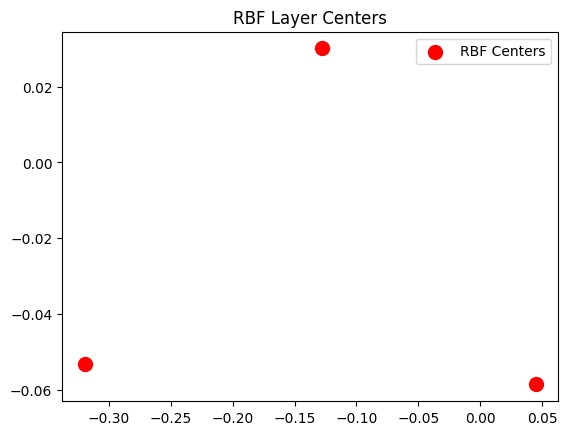

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:


# Ensure TensorFlow is using the GPU
print(tf.config.list_physical_devices('GPU'))

image_size = (224, 224)
batch_size = 32

# Define ImageDataGenerator for train and validation data
# Define ImageDataGenerator for train and validation data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'wheat_leaf',
    target_size=(224, 224),  # Set target_size to (224, 224) for resizing
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'wheat_leaf',
    target_size=(224, 224),  # Set target_size to (224, 224) for resizing
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


# Define custom RBF layer
class RBFLayer(layers.Layer):
    def __init__(self, output_dim):
        self.output_dim = output_dim
        super(RBFLayer, self).__init__()

    def build(self, input_shape):
        kmeans = KMeans(n_clusters=self.output_dim, random_state=42)
        centers = kmeans.fit(np.random.randn(100, input_shape[-1])).cluster_centers_

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[-1]),
                                       initializer=tf.constant_initializer(centers),
                                       trainable=True)
        super(RBFLayer, self).build(input_shape)
        
    def call(self, x):
        diff = tf.expand_dims(x, axis=1) - self.centers
        norm = tf.norm(diff, axis=-1)
        sigma=tf.math.reduce_std(x)
        return tf.exp(-0.1 * tf.square(norm)/(2*(sigma**2)))

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 3)), 
    layers.Dense(128, activation='relu'),
    RBFLayer(3), 
    layers.Dense(3, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator)
print(f'\nTest accuracy: {test_acc}')

# Get RBF layer centers
centers = model.layers[2].get_weights()[0]

# Plot RBF layer centers
plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=100, c='r', label='RBF Centers')
plt.legend()
plt.title('RBF Layer Centers')
plt.show()


In [6]:
from PIL import Image